In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

- id：玩家记录id
- win：是否胜利，标签变量
- kills：击杀次数
- deaths：死亡次数
- assists：助攻次数
- largestkillingspree：最大 killing spree（游戏术语，意味大杀特杀。当你连续杀死三个对方英雄而中途没有死亡时）
- largestmultikill：最大mult ikill（游戏术语，短时间内多重击杀）
- longesttimespentliving：最长存活时间
- doublekills：doublekills次数
- triplekills：doublekills次数
- quadrakills：quadrakills次数
- pentakills：pentakills次数
- totdmgdealt：总伤害
- magicdmgdealt：魔法伤害
- physicaldmgdealt：物理伤害
- truedmgdealt：真实伤害
- largestcrit：最大暴击伤害
- totdmgtochamp：对对方玩家的伤害
- magicdmgtochamp：对对方玩家的魔法伤害
- physdmgtochamp：对对方玩家的物理伤害
- truedmgtochamp：对对方玩家的真实伤害
- totheal：治疗量
- totunitshealed：痊愈的总单位
- dmgtoturrets：对炮塔的伤害
- timecc：法控时间
- totdmgtaken：承受的伤害
- magicdmgtaken：承受的魔法伤害
- physdmgtaken：承受的物理伤害
- truedmgtaken：承受的真实伤害
- wardsplaced：侦查守卫放置次数
- wardskilled：侦查守卫摧毁次数
- firstblood：是否为firstblood 测试集中label字段win为空，需要选手预测。

In [19]:
train_df.head()

,id,win,kills,deaths,assists,largestkillingspree,largestmultikill,longesttimespentliving,doublekills,triplekills,...,totunitshealed,dmgtoturrets,timecc,totdmgtaken,magicdmgtaken,physdmgtaken,truedmgtaken,wardsplaced,wardskilled,firstblood
0,0,0,1,5,2,0,1,569,0,0,...,2,0,0,7819,2178,5239,401,4,1,0
1,1,0,5,8,7,3,1,880,0,0,...,4,303,0,24637,5607,17635,1394,10,0,0
2,2,1,1,6,16,0,1,593,0,0,...,3,329,0,18749,3651,14834,263,7,1,0
3,3,0,1,2,0,0,1,381,0,0,...,1,0,0,12134,1739,10318,76,8,1,0
4,4,0,4,11,25,0,1,455,0,0,...,8,0,0,27891,14068,12749,1073,34,2,0


In [20]:
train_df = train_df.drop(['id', 'timecc'], axis=1)
test_df = test_df.drop(['id', 'timecc'], axis=1)

# 创建交叉特征
train_df['kd_ratio'] = train_df['kills'] / (train_df['deaths'] + 1)
train_df['multikill_ratio'] = train_df['largestmultikill'] / (train_df['kills'] + 1)
train_df['heal_damage_ratio'] = train_df['totheal'] / (train_df['totdmgdealt'] + 1)
train_df['damage_taken_ratio'] = train_df['totdmgtochamp'] / (train_df['totdmgtaken'] + 1)
train_df['kill_turret_ratio'] = train_df['kills'] / (train_df['dmgtoturrets'] + 1)
train_df['crit_damage_ratio'] = train_df['largestcrit'] / (train_df['totdmgdealt'] + 1)

test_df['kd_ratio'] = test_df['kills'] / (test_df['deaths'] + 1)
test_df['multikill_ratio'] = test_df['largestmultikill'] / (test_df['kills'] + 1)
test_df['heal_damage_ratio'] = test_df['totheal'] / (test_df['totdmgdealt'] + 1)
test_df['damage_taken_ratio'] = test_df['totdmgtochamp'] / (test_df['totdmgtaken'] + 1)
test_df['kill_turret_ratio'] = test_df['kills'] / (test_df['dmgtoturrets'] + 1)
test_df['crit_damage_ratio'] = test_df['largestcrit'] / (test_df['totdmgdealt'] + 1)

In [21]:
train_df.isnull().mean(0)

win                       0.0
kills                     0.0
deaths                    0.0
assists                   0.0
largestkillingspree       0.0
largestmultikill          0.0
longesttimespentliving    0.0
doublekills               0.0
triplekills               0.0
quadrakills               0.0
pentakills                0.0
totdmgdealt               0.0
magicdmgdealt             0.0
physicaldmgdealt          0.0
truedmgdealt              0.0
largestcrit               0.0
totdmgtochamp             0.0
magicdmgtochamp           0.0
physdmgtochamp            0.0
truedmgtochamp            0.0
totheal                   0.0
totunitshealed            0.0
dmgtoturrets              0.0
totdmgtaken               0.0
magicdmgtaken             0.0
physdmgtaken              0.0
truedmgtaken              0.0
wardsplaced               0.0
wardskilled               0.0
firstblood                0.0
dtype: float64

<Axes: xlabel='win'>

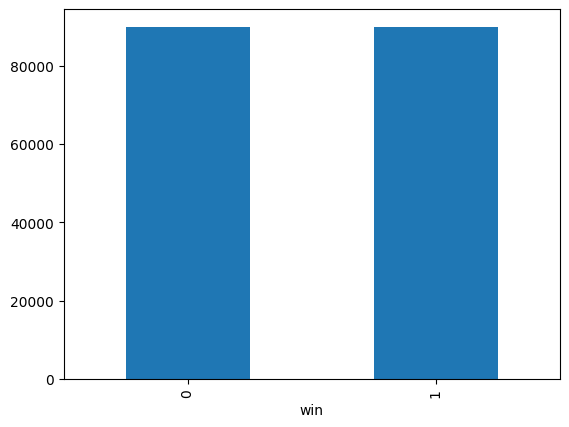

In [22]:
train_df['win'].value_counts().plot(kind='bar')

<Axes: xlabel='kills', ylabel='Count'>

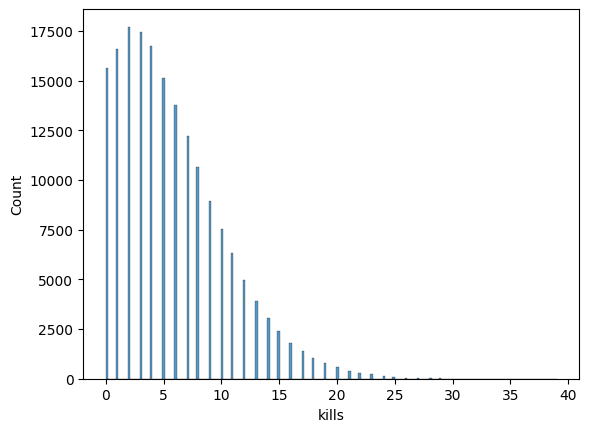

In [23]:
sns.histplot(train_df['kills'], kde=False)

<Axes: xlabel='deaths', ylabel='Count'>

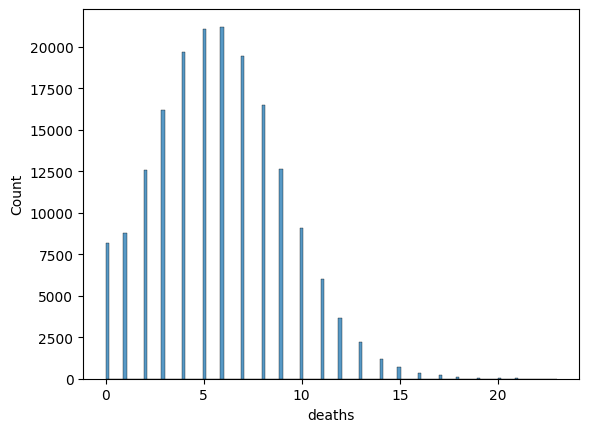

In [24]:
sns.histplot(train_df['deaths'], kde=False)

<Axes: xlabel='win', ylabel='kills'>

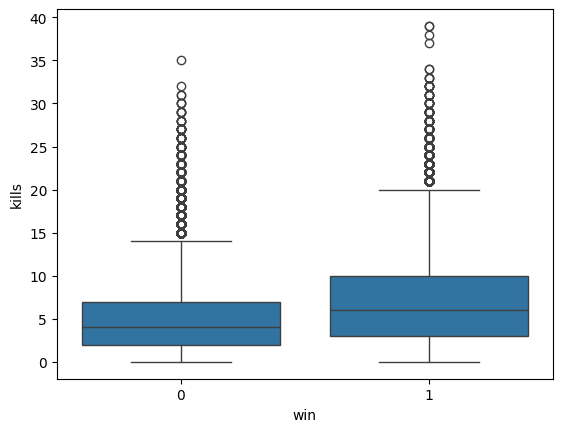

In [25]:
sns.boxplot(data=train_df, y='kills', x='win')

Text(0, 0.5, 'deaths')

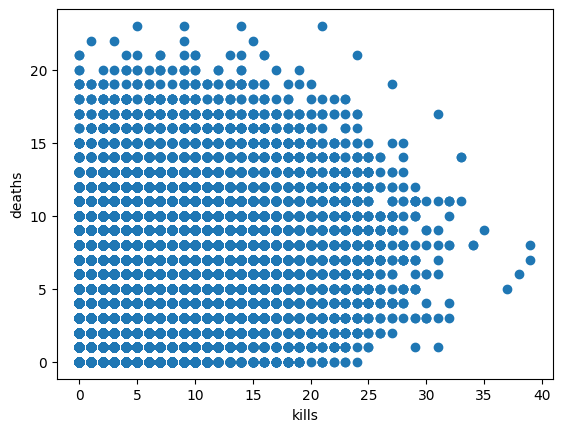

In [26]:
plt.scatter(train_df['kills'], train_df['deaths'])
plt.xlabel('kills')
plt.ylabel('deaths')

In [27]:
# 归一化
for col in train_df.columns[1:]:
    train_df[col] /= train_df[col].max()
    test_df[col] /= test_df[col].max()

In [28]:
import random
import numpy as np

import paddle
import paddle.nn as nn
from argparse import Namespace


seed = 42
# 设置随机数
paddle.seed(seed)
np.random.seed(seed)
random.seed(seed)
paddle.seed(42)

print(paddle.utils.run_check())
print(paddle.device.get_device())

Running verify PaddlePaddle program ... 
PaddlePaddle works well on 1 GPU.
PaddlePaddle is installed successfully! Let's start deep learning with PaddlePaddle now.
None
gpu:0


In [29]:
args = Namespace(
    # train
    epochs = 10,
    BATCH_SIZE = 100,
    lr = 1e-2,
    patience = 4,
    device = 'gpu',
    # model
    hidden_size = 40,
    input_size = 30,
)

print(paddle.utils.run_check())
print(paddle.device.get_device())

Running verify PaddlePaddle program ... 
PaddlePaddle works well on 1 GPU.
PaddlePaddle is installed successfully! Let's start deep learning with PaddlePaddle now.
None
gpu:0


In [30]:
class Classifier(nn.Layer):
    # self代表类的实例自身
    def __init__(self):
        # 初始化父类中的一些参数
        super(Classifier, self).__init__()
        
        self.fc1 = paddle.nn.Linear(in_features=29, out_features=40)
        self.fc2 = paddle.nn.Linear(in_features=40, out_features=1)
        self.relu = paddle.nn.ReLU()
    
    # 网络的前向计算
    def forward(self, inputs):
        x = self.relu(self.fc1(inputs))
        x = self.fc2(x)
        return x

In [31]:
device = paddle.set_device(args.device)
model = Classifier()
model.train()
criterion = paddle.nn.BCEWithLogitsLoss()
optimizer = paddle.optimizer.SGD(learning_rate=args.lr, parameters=model.parameters())

train_loss = []
valid_loss = []
train_epochs_loss = []
valid_epochs_loss = []

In [32]:
training_data = train_df.iloc[:-1000,].values.astype(np.float32)
val_data = train_df.iloc[-1000:, ].values.astype(np.float32)

# 定义外层循环
for epoch_id in range(args.epochs):
    # 在每轮迭代开始之前，将训练数据的顺序随机的打乱
    
    np.random.shuffle(training_data)
    
    # 将训练数据进行拆分，每个batch包含10条数据
    mini_batches = [training_data[k:k+args.BATCH_SIZE] for k in range(0, len(training_data), args.BATCH_SIZE)]
    
    # 定义内层循环
    for iter_id, mini_batch in enumerate(mini_batches):
        x = np.array(mini_batch[:, 1:]) # 获得当前批次训练数据
        y = np.array(mini_batch[:, :1]) # 获得当前批次训练标签
        
        # 将numpy数据转为飞桨动态图tensor的格式
        features = paddle.to_tensor(x).to(args.device)
        y = paddle.to_tensor(y).to(args.device)
        
        # 前向计算
        predicts = model(features)
        
        # 计算损失
        loss = criterion(predicts, y, )
        avg_loss = paddle.mean(loss)
        if iter_id%200==0:
            acc = (predicts > 0).astype(int).flatten() == y.flatten().astype(int)
            acc = acc.astype(float).mean()

            print("epoch: {}, iter: {}, loss is: {:.4f}, acc is {:.4f}".format(epoch_id, iter_id, avg_loss.numpy(), acc.numpy()))
        
        # 反向传播，计算每层参数的梯度值
        avg_loss.backward()
        # 更新参数，根据设置好的学习率迭代一步
        optimizer.step()
        # 清空梯度变量，以备下一轮计算
        optimizer.clear_grad()

epoch: 0, iter: 0, loss is: 0.7029, acc is 0.3400
epoch: 0, iter: 200, loss is: 0.6900, acc is 0.5000
epoch: 0, iter: 400, loss is: 0.6825, acc is 0.6500
epoch: 0, iter: 600, loss is: 0.6733, acc is 0.7200
epoch: 0, iter: 800, loss is: 0.6555, acc is 0.7200
epoch: 0, iter: 1000, loss is: 0.6530, acc is 0.7600
epoch: 0, iter: 1200, loss is: 0.6478, acc is 0.7500
epoch: 0, iter: 1400, loss is: 0.6495, acc is 0.7200
epoch: 0, iter: 1600, loss is: 0.6404, acc is 0.7300
epoch: 1, iter: 0, loss is: 0.6440, acc is 0.7600
epoch: 1, iter: 200, loss is: 0.6239, acc is 0.7400
epoch: 1, iter: 400, loss is: 0.6188, acc is 0.7300
epoch: 1, iter: 600, loss is: 0.6175, acc is 0.7800
epoch: 1, iter: 800, loss is: 0.6103, acc is 0.7400
epoch: 1, iter: 1000, loss is: 0.6161, acc is 0.7100
epoch: 1, iter: 1200, loss is: 0.6019, acc is 0.7800
epoch: 1, iter: 1400, loss is: 0.5707, acc is 0.7700
epoch: 1, iter: 1600, loss is: 0.5545, acc is 0.7900
epoch: 2, iter: 0, loss is: 0.5209, acc is 0.7900
epoch: 2, 

In [33]:
model.eval()
test_data = paddle.to_tensor(test_df.values.astype(np.float32))
test_predict = model(test_data)
test_predict = (test_predict > 0).astype(int).flatten()

In [34]:
pd.DataFrame({'win':
              test_predict.numpy()
             }).to_csv('submission.csv', index=None)

In [35]:
import zipfile

# 定义文件名
csv_filename = 'submission.csv'
zip_filename = 'submission.zip'

# 创建一个Zip文件并将CSV文件添加进去
with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write(csv_filename)

print(f'{csv_filename} has been compressed into {zip_filename}')

submission.csv has been compressed into submission.zip
